# Publication Author Analysis 

## Objective
### A text mining analysis of Covid-19 related publications across OSU to discover the abstract topics that occur in a collection of documents.

## Data Source
### Elements Coronavirus Publications report

## Scope of Analysis
### TimeFrame: 3/1/2020 - Present

### Importing required packages

In [15]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
from mycolorpy import colorlist as mcp
import squarify
import requests
import io
import os

### Importing the base dataset

In [17]:
df = pd.read_csv(r'./Data/Covid19publications_input_data.csv')

### Data Cleaning Operations
#### a) Subset all publications after March 1st 2020 based on Publication date.
#### b) The title column have been cleaned to remove punctuations and convert them to lowercase. The extra white spaces have also been removed.
#### b) Author's department name has been combined with their First and Last Name.

In [6]:
df['publication-date'] = pd.to_datetime(df['publication-date'])
df = df[df['publication-date'] >= '3/1/2020']

In [7]:
df['title_cleaned'] = df['title'].str.replace('[{}]'.format(string.punctuation), '').str.lower()
df['title_cleaned'] = df['title_cleaned'].str.strip()

<ipython-input-7-ec3cc7b29eb5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title_cleaned'] = df['title'].str.replace('[{}]'.format(string.punctuation), '').str.lower()


In [8]:
df['Full Name'] = df['First Name'] +' '+df['Last Name']+ ' ( '+ df['Primary Group Descriptor']+' ) '

In [9]:
df.head()

,ID,Group ID,First Name,Last Name,Primary Group Descriptor,Department,Publication ID,title,abstract,authors,publication-date,title_cleaned,Full Name
0,3138,108,Pratul,Agarwal,VP For Research,VP For Research,168203,"SARS-CoV-2 Genomes From Oklahoma, United States",Genomic sequencing has played a major role in ...,Narayanan S; Ritchey JC; Patil G; Narasaraju T...,2021-02-03,sarscov2 genomes from oklahoma united states,Pratul Agarwal ( VP For Research )
1,2540,10,Tutaleni,Asino,College of Educ and Human Sci,"Ed Fndn, Ldrshp & Aviation (SEFLA)",168447,A global outlook to the interruption of educat...,Uncertain times require prompt reflexes to sur...,Bozkurt A; Jung I; Xiao J; Vladimirschi V; Sch...,2020-06-06,a global outlook to the interruption of educat...,Tutaleni Asino ( College of Educ and Human Sci )
2,2660,2,Arunkumar,Bagavathi,Dean of Arts and Sciences,Computer Science,198704,MG-NET: Leveraging Pseudo-imaging for Multi-mo...,The emergence of novel pathogens and zoonotic ...,Aakur SN; Narayanan S; Indla V; Bagavathi A; L...,2021-01-01,mgnet leveraging pseudoimaging for multimodal ...,Arunkumar Bagavathi ( Dean of Arts and Science...
3,2660,2,Arunkumar,Bagavathi,Dean of Arts and Sciences,Computer Science,196420,MG-NET: Leveraging Pseudo-Imaging for Multi-Mo...,The emergence of novel pathogens and zoonotic ...,Aakur SN; Narayanan S; Indla V; Bagavathi A; R...,2021-07-21,mgnet leveraging pseudoimaging for multimodal ...,Arunkumar Bagavathi ( Dean of Arts and Science...
4,1638,2,Amanda,Baraldi,Dean of Arts and Sciences,Psychology,195738,Faith and science mindsets as predictors of CO...,The COVID-19 pandemic allowed for a naturalist...,Johnson KA; Baraldi AN; Moon JW; Okun MA; Cohe...,2021-09-01,faith and science mindsets as predictors of co...,Amanda Baraldi ( Dean of Arts and Sciences )


### Exploratory Data Analysis

#### a) The Publication ID has been counted for every author in every department and stored in a dataframe.
#### b) A different color scheme has been specified for every department for the below mentioned plots.
#### c) The legends specify the departments in both the plots.

In [10]:
author_counts = df.groupby(['Full Name','Primary Group Descriptor'])['Publication ID'].count().to_frame().reset_index()

In [11]:
author_counts

,Full Name,Primary Group Descriptor,Publication ID
0,Ada Cino Ozuna ( Dean of Veterinary Medicine ),Dean of Veterinary Medicine,1
1,Akansha Singh ( Dean of Veterinary Medicine ),Dean of Veterinary Medicine,1
2,Akhilesh Ramachandran ( Dean of Veterinary Med...,Dean of Veterinary Medicine,4
3,Ali Mirchi ( Div of Agriculture Sci & Nat Rsrc...,Div of Agriculture Sci & Nat Rsrcs,1
4,Amanda Baraldi ( Dean of Arts and Sciences ),Dean of Arts and Sciences,1
...,...,...,...
73,Tutaleni Asino ( College of Educ and Human Sci ),College of Educ and Human Sci,1
74,Valerie Freeman ( Dean of Arts and Sciences ),Dean of Arts and Sciences,2
75,Xuewei Chen ( College of Educ and Human Sci ),College of Educ and Human Sci,1
76,Xufang Deng ( Dean of Veterinary Medicine ),Dean of Veterinary Medicine,6


In [12]:
groups = author_counts['Primary Group Descriptor'].unique()
norm = cm.colors.Normalize(vmin=0, vmax=1000)
color2=mcp.gen_color(cmap="Paired",n=16)

In [13]:
### Specifying color scheme for every department ###

group_colors = {}
unique_users = list(set(groups)) 
step_size = 100
for i, user in enumerate(unique_users):
    group_colors[user] = color2[i+1]

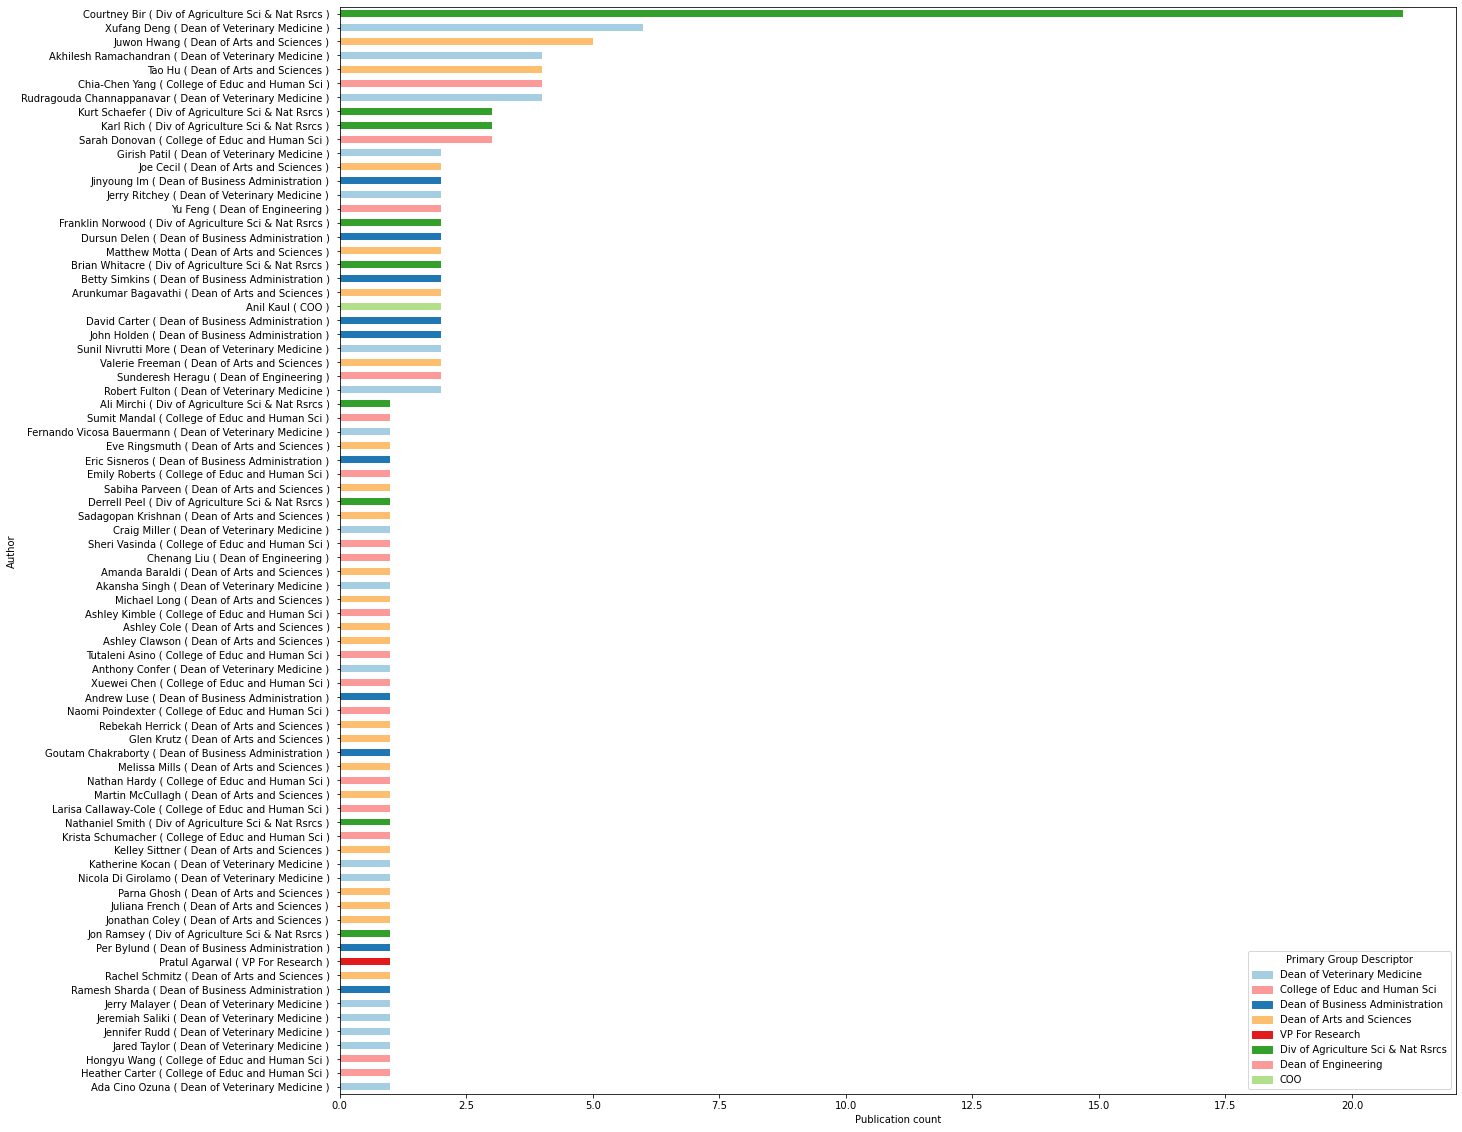

In [14]:
### Author count plot ###

author_counts = author_counts.sort_values('Publication ID')
s = pd.Series(author_counts.iloc[:,2].values, index=author_counts.iloc[:,0])

plt.figure(figsize=(20,20))
s.plot(kind='barh', color=[group_colors[i] for i in author_counts['Primary Group Descriptor']])

labels = author_counts['Primary Group Descriptor'].unique()
handles = [plt.Rectangle((0,0),1,1, color=group_colors[l]) for l in labels]
plt.legend(handles, labels, title='Primary Group Descriptor')
plt.xlabel("Publication count")
plt.ylabel("Author")

plt.show()


In [15]:
#### Publication count Plot #####

In [16]:
group_counts = df.groupby(['Primary Group Descriptor'])['Publication ID'].count().to_frame().reset_index()
group_counts['color']= group_counts['Primary Group Descriptor'].map(group_colors)
group_counts['perc']= group_counts['Publication ID']/group_counts['Publication ID'].sum()

In [17]:
group_counts.sort_values('perc', ascending=False)

,Primary Group Descriptor,Publication ID,color,perc
6,Div of Agriculture Sci & Nat Rsrcs,35,#33a02c,0.244755
2,Dean of Arts and Sciences,33,#fdbf6f,0.230769
5,Dean of Veterinary Medicine,33,#a6cee3,0.230769
1,College of Educ and Human Sci,19,#fb9a99,0.132867
3,Dean of Business Administration,15,#1f78b4,0.104895
4,Dean of Engineering,5,#fb9a99,0.034965
0,COO,2,#b2df8a,0.013986
7,VP For Research,1,#e31a1c,0.006993


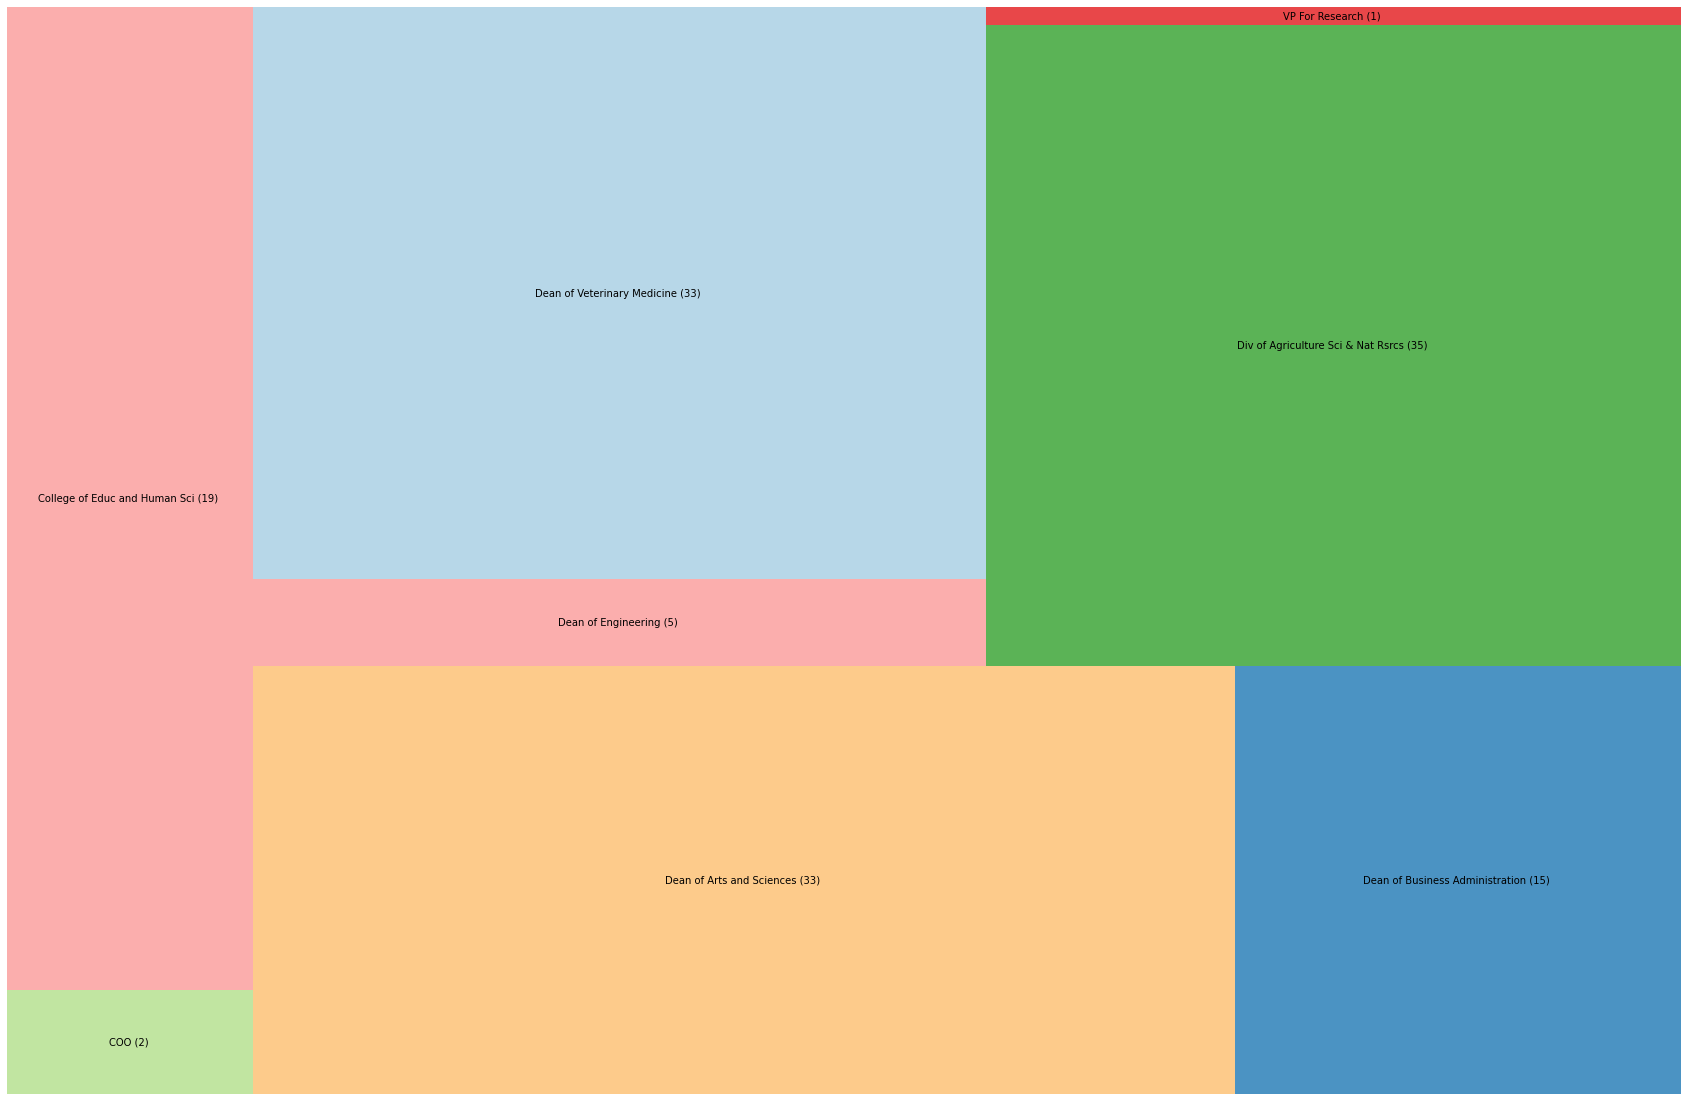

In [18]:
# Author count plot
group_counts['labels'] = group_counts['Primary Group Descriptor']+ ' (' + group_counts['Publication ID'].astype(str) +') '
plt.figure(figsize=(30,20))
squarify.plot(sizes=group_counts['Publication ID'], label=group_counts['labels'],color=group_counts['color'],alpha=.8)
plt.axis('off')
plt.show()

### Insights

#### a) Dean of Veterinary Medicine has the largest number of  (84).
#### b) Dean of Veterinary Medicine	, Dean of Arts and Sciences and Div of Agriculture Sci & Nat Rsrcs com comprise 70% of the publications related to Covid-19